### Sprint 8: Proyecto (primera parte)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
from bs4 import BeautifulSoup

URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
date = []
temp = []
weather_description = []

weather_table = soup.find('table', attrs={"id": "weather_records"})
#print(weather_table)

for row in weather_table.find_all('tr')[1:]:
    cols = row.find_all('td')
    date.append(cols[0].text.strip())
    temp.append(cols[1].text.strip())
    weather_description.append(cols[2].text.strip())

#print("Dates:", date)
#print("Temperatures:", temp)
#print("Weather Descriptions:", weather_description)

weather_records = pd.DataFrame({'Date and time': date, 'Temperature': temp, 'Description': weather_description})
weather_records
#print(req.text)

In [ ]:
import requests
from bs4 import BeautifulSoup

URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
date = []
temp = []
weather_description = []

weather_table = soup.find('table', attrs={"id": "weather_records"})
#print(weather_table)

for row in soup.find_all('tr')[1:]:
    cols = row.find_all('td')
    date.append(cols[0].text.strip())
    temp.append(cols[1].text.strip())
    weather_description.append(cols[2].text.strip())

print("Dates:", date)
print("Temperatures:", temp)
print("Weather Descriptions:", weather_description)

1. 

Imprime el campo company_name. Encuentra la cantidad de viajes en taxi para cada compañía de taxis para el 15 y 16 de noviembre de 2017, asigna al campo resultante el nombre trips_amount e imprímelo también. Ordena los resultados por el campo trips_amount en orden descendente.

SELECT
    company_name,
    COUNT(trip_id) AS trips_amount
FROM
    trips t
JOIN
    cabs c ON c.cab_id = t.cab_id
WHERE
    start_ts :: date BETWEEN '2017-11-15' AND '2017-11-16'
GROUP BY
    company_name
ORDER BY
    trips_amount DESC

2.

Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

SELECT
    company_name,
    COUNT(trip_id) AS trips_amount
FROM
    trips t
JOIN
    cabs c ON c.cab_id = t.cab_id
WHERE
    (company_name LIKE '%Yellow%' OR company_name LIKE '%Blue%')
    AND
    start_ts :: date BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY
    company_name

3.

Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Asigna el nombre company al campo con nombres de empresas de taxis. Ordena el resultado en orden descendente por trips_amount.

SELECT
    CASE
        WHEN company_name = 'Flash Cab' THEN 'Flash Cab'
        WHEN company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
        ELSE 'Other'
    END AS company,
    COUNT(trip_id) AS trips_amount
    
FROM
    trips t
JOIN
    cabs c ON c.cab_id = t.cab_id
WHERE 
    start_ts :: date BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY
    company
ORDER BY
    trips_amount DESC

4.

Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

SELECT
    *
FROM 
    neighborhoods
WHERE
    name LIKE '%Hare' OR name = 'Loop'

5.

Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: Bad si el campo description contiene las palabras rain o storm, y Good para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.

SELECT
    start_ts,
    CASE
        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM
    trips t
JOIN 
    weather_records w ON w.ts = t.start_ts
GROUP BY 
    start_ts,
    weather_conditions
ORDER BY 
    start_ts

6.

Recupera de la tabla de trips todos los viajes que comenzaron en el Loop (pickup_location_id: 50) el sábado y terminaron en O'Hare (dropoff_location_id: 63). Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje. Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

SELECT
    start_ts,
    CASE
        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions,
    duration_seconds
FROM 
    trips t
JOIN
    weather_records w ON w.ts = t.start_ts
WHERE
    pickup_location_id = 50
    AND
    dropoff_location_id = 63
    AND
    EXTRACT(DOW FROM start_ts) = 6
    AND
    description IS NOT null
ORDER BY 
    trip_id;

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

company_trips = pd.read_csv("E:\\datasets\\project_sql_result_01.csv.")

location_avg_trips = pd.read_csv("E:\\datasets\\project_sql_result_04.csv.")

trips_loop_airport = pd.read_csv("E:\\datasets\\project_sql_result_07.csv.")


In [64]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [65]:
company_trips.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [66]:
location_avg_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [67]:
location_avg_trips.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Las tablas contienen 2 columnas cada una, sin valores nulos o ausentes. Los tipos de datos son correctos.

Los 10 principales barrios en términos de finalización del recorrido

In [68]:
location_avg_trips.nlargest(10, 'average_trips')

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Gráficos

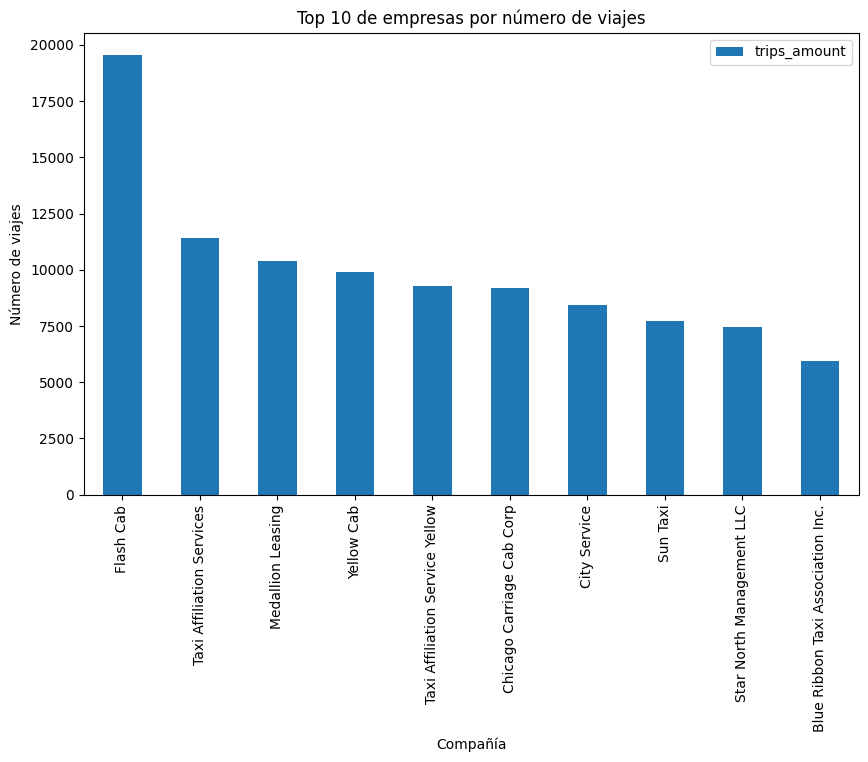

In [4]:
top_10_companies_by_trips = company_trips.nlargest(10, 'trips_amount')
top_10_companies_by_trips.plot(kind='bar', x='company_name', y='trips_amount', title='Top 10 de empresas por número de viajes',figsize=(10, 6))

plt.xlabel('Compañía')
plt.ylabel('Número de viajes')
plt.show()

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
Listo!

Conclusión: Flash Cab es la empresa con mayor numero de viajes con 14% de los viajes totales.

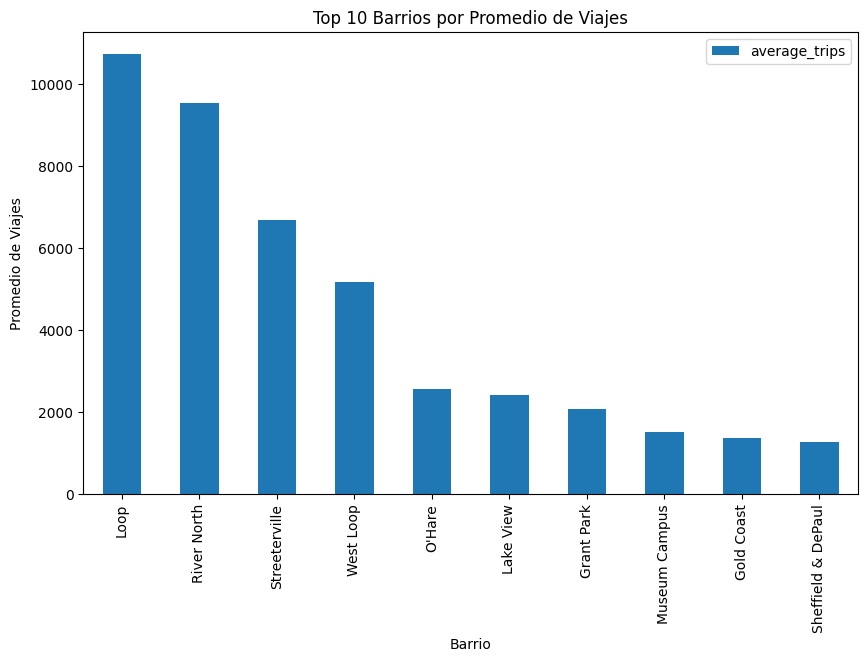

In [70]:
top_10_neighborhoods = location_avg_trips.nlargest(10, 'average_trips')
top_10_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips', title='Top 10 Barrios por Promedio de Viajes', figsize=(10, 6))

plt.xlabel('Barrio')
plt.ylabel('Promedio de Viajes')
plt.show()

Conclusión: Loop es el barrio con mayor numero de viajes en promedio.

Prueba de hipótesis

In [ ]:
trips_loop_airport['start_ts'] = pd.to_datetime(trips_loop_airport['start_ts'])

In [ ]:
#trips_loop_airport['weekday'] = trips_loop_airport['start_ts'].dt.dayofweek

In [ ]:
#test = trips_loop_airport.query('weekday != 5')

In [ ]:
#Variable con la duracion de los viajes con mal clima

bad_weather_trips = trips_loop_airport[trips_loop_airport['weather_conditions'].str.contains('Bad')].drop(columns=['weather_conditions', 'start_ts']).dropna()

bad_weather_trips

In [ ]:
#Variable con la duracion de los viajes con buen clima

good_weather_trips = trips_loop_airport[trips_loop_airport['weather_conditions'].str.contains('Good')].drop(columns=['weather_conditions', 'start_ts']).dropna()   

good_weather_trips

Prueba de Levine para comprobar si las varianzas son iguales o no.

In [71]:
### Prueba de Levine
###  H0: Las varianzas de los 2 grupos son iguales.
### H1: Las varianzas de los 2 grupos no son iguales.

bad_weather_var = bad_weather_trips.var()

good_weather_var = good_weather_trips.var()

results = st.levene(bad_weather_trips, good_weather_trips)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza hipotesis nula, las varianzas no son iguales")
else:
    print("No se rechaza la hipotesis nula, las varianzas son iguales")


[0.53320387]
No se rechaza la hipotesis nula, las varianzas son iguales


Prueba t para muestras independientes con varianzas iguales

In [73]:
#### Prueba de T de Student
### H0: Las medias de los 2 grupos son iguales.
### H1: Las medias de los 2 grupos no son iguales.

results = st.ttest_ind(bad_weather_trips, good_weather_trips, equal_var=True)

print(results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza hipotesis nula, las medias no son iguales")
else:
    print("No se rechaza la hipotesis nula, las medias son iguales")

[6.51797033e-12]
Se rechaza hipotesis nula, las medias no son iguales


Conclusion: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.